In [83]:
import time, glob, os, cv2
import pydicom
import matplotlib.pyplot as plt
import numpy as np

In [84]:
all_dicoms=glob.glob('./dicoms_mogrify/*.dcm')

In [ ]:
Performance: 
pydicom = 0.0749s
dcmj2pnm = 6.85777s
mogrify = 14.15s
convert2 = 13.86s

Using dask we can reduce the time by using all the cores to 9.5 seconds, but this works only for multiple images
and not for single

The mogrify utility needs some changes related to OpenCL and build the library again to make it run on GPU.

In [79]:
6.8577/15

0.45718000000000003

In [91]:
8.64/15

0.5760000000000001

In [92]:
4.74/15

0.316

# pydicom

(720, 1280)
0 117720763
(720, 1280)
1 123312733
(720, 1280)
2 138665871
(720, 1280)
3 134045416
(720, 1280)
4 126468183
(720, 1280)
5 161413069
(720, 1280)
6 151784489
(720, 1280)
7 135079446
(720, 1280)
8 116206963
(720, 1280)
9 125350557
(720, 1280)
10 149135546
(720, 1280)
11 133381499
(720, 1280)
12 116138742
(720, 1280)
13 113013497
(720, 1280)
14 155898513
0.07524967193603516


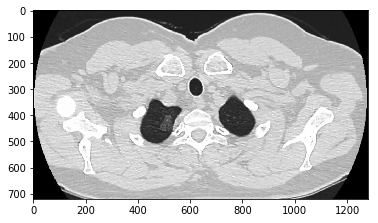

In [87]:
start=time.time()
for idx, i in enumerate(all_dicoms[0:15]):
    img = pydicom.dcmread(i)
    
    if img.file_meta.TransferSyntaxUID.is_compressed:
        decompresser(i)
        
    image = img.pixel_array
    image=image.astype('uint8')
#     image=cv2.resize(image, (512,512))
    print (image.shape)
    
    print (idx, np.sum(image))
end=time.time()

print (end-start)
plt.imshow(image, cmap='gray')

# dcmj2pnm

0 353048922 (720, 1280, 3)
1 369229521 (720, 1280, 3)
2 415997427 (720, 1280, 3)
3 402140718 (720, 1280, 3)
4 379405590 (720, 1280, 3)
5 484255203 (720, 1280, 3)
6 455365230 (720, 1280, 3)
7 405246534 (720, 1280, 3)
8 348622677 (720, 1280, 3)
9 376057116 (720, 1280, 3)
10 447405927 (720, 1280, 3)
11 400148109 (720, 1280, 3)
12 348419946 (720, 1280, 3)
13 339037734 (720, 1280, 3)
14 467709780 (720, 1280, 3)
5.089430332183838


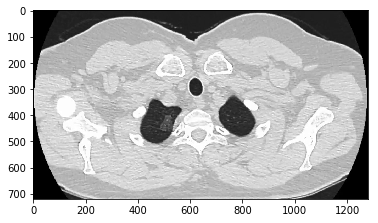

In [89]:
start=time.time()

for idx, i in enumerate(all_dicoms[0:15]):
    img = pydicom.dcmread(i)
    
    if img.file_meta.TransferSyntaxUID.is_compressed:
        decompresser(i)
        
    if '.dcm' in i:                                     
        img_path = i.split('.dcm')[0] + '.jpeg'          
    else:                                                       
        img_path = i + '.jpeg'   
        
    os.system("dcmj2pnm --write-jpeg "+i+" "+img_path)
    
    image=cv2.imread(img_path)
    
    print (idx, np.sum(image), image.shape)
    
end=time.time()

print (end-start)
plt.imshow(image, cmap='gray')

In [82]:
6.43/15

0.42866666666666664

# Mogrify

8.644293308258057


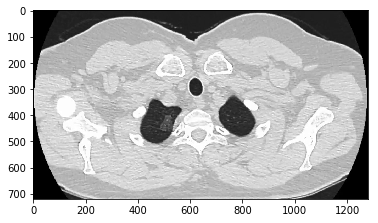

In [90]:
start=time.time()

for idx, i in enumerate(all_dicoms[0:15]):
    img = pydicom.dcmread(i)
    
    if img.file_meta.TransferSyntaxUID.is_compressed:
        decompresser(i)
        
    if '.dcm' in i:                                     
        img_path = i.split('.dcm')[0] + '.jpeg'          
    else:                                                       
        img_path = i + '.jpeg'   
        
    os.system("mogrify   -format   jpeg {0}".format(i))
    
#     image=cv2.imread(img_path)
    
#     print (idx, np.sum(image), image.shape)
    
end=time.time()

print (end-start)
plt.imshow(image, cmap='gray')

0 353050044 (720, 1280, 3)
1 369232434 (720, 1280, 3)
2 415997613 (720, 1280, 3)
3 402136248 (720, 1280, 3)
4 379404549 (720, 1280, 3)
5 484239207 (720, 1280, 3)
6 455353467 (720, 1280, 3)
7 405238338 (720, 1280, 3)
8 348630909 (720, 1280, 3)
9 376051671 (720, 1280, 3)
10 447406638 (720, 1280, 3)
11 400144497 (720, 1280, 3)
12 348426246 (720, 1280, 3)
13 339040491 (720, 1280, 3)
14 467695539 (720, 1280, 3)
14.27546739578247


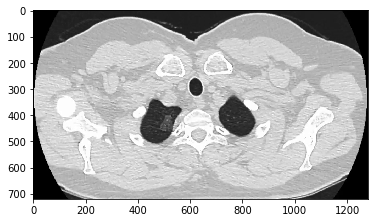

In [86]:
start=time.time()

for idx, i in enumerate(all_dicoms[0:15]):
    img = pydicom.dcmread(i)
    
    if img.file_meta.TransferSyntaxUID.is_compressed:
        decompresser(i)
        
    if '.dcm' in i:                                     
        img_path = i.split('.dcm')[0] + '.png'          
    else:                                                       
        img_path = i + '.png'   
        
    os.system("mogrify   -format   png {0}".format(i))
    
    image=cv2.imread(img_path)
    
    print (idx, np.sum(image), image.shape)
    
end=time.time()

print (end-start)
plt.imshow(image, cmap='gray')

# Convert2 

0 348630909 (720, 1280, 3)
1 400144497 (720, 1280, 3)
2 452439075 (720, 1280, 3)
3 347113971 (720, 1280, 3)
4 349630818 (720, 1280, 3)
5 450658629 (720, 1280, 3)
6 479664618 (720, 1280, 3)
7 336679200 (720, 1280, 3)
8 353412042 (720, 1280, 3)
9 347103735 (720, 1280, 3)
10 472775988 (720, 1280, 3)
11 370282806 (720, 1280, 3)
12 383376891 (720, 1280, 3)
13 430255617 (720, 1280, 3)
14 409048359 (720, 1280, 3)
13.860858917236328


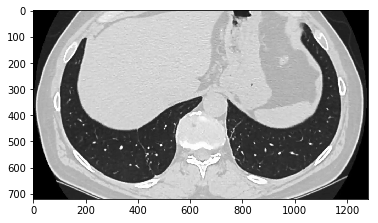

In [60]:
start=time.time()

for idx, i in enumerate(all_dicoms[0:15]):
    img = pydicom.dcmread(i)
    
    if img.file_meta.TransferSyntaxUID.is_compressed:
        decompresser(i)
        
    if '.dcm' in i:                                     
        img_path = i.split('.dcm')[0] + '.png'          
    else:                                                       
        img_path = i + '.png'   
        
    os.system("convert "+i+" "+img_path)
    
    image=cv2.imread(img_path)
    
    print (idx, np.sum(image), image.shape)
    
end=time.time()

print (end-start)
plt.imshow(image, cmap='gray')

# Dask Utility

In [67]:
import dask as dd
import dask.array as da
from dask.distributed import Client, progress

In [68]:
def convert_images(i):    
    img = pydicom.dcmread(i)
    
    if img.file_meta.TransferSyntaxUID.is_compressed:
        decompresser(i)
        
    if '.dcm' in i:                                     
        img_path = i.split('.dcm')[0] + '.png'          
    else:                                                       
        img_path = i + '.png'   
        
    os.system("mogrify   -format   png {0}".format(i))
    
    image=cv2.imread(img_path)
    
    print (idx, np.sum(image), image.shape)

In [72]:
all_images = [dd.delayed(convert_images)(all_dicoms[x]) for x in range(len(all_dicoms))]

t = time.time()
dd.compute(all_images)
print("Time taken when using all cores: ", time.time()-t)

14 383376891 (720, 1280, 3)
14 347113971 (720, 1280, 3)
14 479664618 (720, 1280, 3)
14 472775988 (720, 1280, 3)
14 348026331 (720, 1280, 3)
14 430255617 (720, 1280, 3)
14 409048359 (720, 1280, 3)
14 348630909 (720, 1280, 3)
14 450658629 (720, 1280, 3)
14 452439075 (720, 1280, 3)
14 353412042 (720, 1280, 3)
14 349630818 (720, 1280, 3)
14 370282806 (720, 1280, 3)
14 336679200 (720, 1280, 3)
14 400144497 (720, 1280, 3)
14 498633588 (720, 1280, 3)
14 334925520 (720, 1280, 3)
14 347103735 (720, 1280, 3)
Time taken when using all cores:  10.07554316520691
